In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


# **Sample Dataset**

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Load the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Sample text
text = "NLTK is an amazing library for NLP!"

# Sentiment analyzer from NLTK
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(text)

print(sentiment_scores)


{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.6239}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [8]:
import spacy

# Sample text
text = "SpaCy is a powerful NLP library."

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

# Analyzing sentiment using SpaCy (which doesn't have a built-in sentiment analysis)
doc = nlp(text)

# Extracting sentiment based on rules (example: using the presence of certain words)
positive_words = ['powerful', 'awesome', 'amazing', 'great']
negative_words = ['bad', 'terrible', 'awful', 'horrible']

sentiment_score = 0

for token in doc:
    if token.text.lower() in positive_words:
        sentiment_score += 1
    elif token.text.lower() in negative_words:
        sentiment_score -= 1

if sentiment_score > 0:
    print("Positive sentiment detected!")
elif sentiment_score < 0:
    print("Negative sentiment detected!")
else:
    print("Neutral sentiment detected.")


Positive sentiment detected!


In [ ]:
import pandas as pd
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('sentiwordnet')

# Load your social media dataset with 'TEXT' column
data = pd.read_csv('/content/drive/My Drive/electiveFinal/test-new.csv')  # Replace with your dataset file

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Initialize counts
positive_counts = 0
negative_counts = 0
neutral_counts = 0

# Function to calculate sentiment score for a sentence using SentiWordNet
def calculate_sentiment_score(text):
    global positive_counts, negative_counts, neutral_counts  # Use global counts

    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

    pos_score = 0
    neg_score = 0
    word_count = 0

    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        for syn in synsets:
            pos_score += syn.pos_score()
            neg_score += syn.neg_score()
        word_count += 1

    # Calculate average sentiment score for the sentence
    if word_count > 0:
        avg_pos_score = pos_score / word_count
        avg_neg_score = neg_score / word_count
        sentiment_score = avg_pos_score - avg_neg_score

        if sentiment_score > 0:
            positive_counts += 1
            return 'positive'
        elif sentiment_score < 0:
            negative_counts += 1
            return 'negative'
        else:
            neutral_counts += 1
            return 'neutral'
    else:
        return 'neutral'

# Apply sentiment analysis function to each text in the dataset
data['Sentiment'] = data['TEXT'].apply(calculate_sentiment_score)

# Display the dataset with sentiment labels
print(data[['TEXT', 'Sentiment']])

# Display counts at the end
print("\nSentiment Counts:")
print(f"Positive: {positive_counts}")
print(f"Negative: {negative_counts}")
print(f"Neutral: {neutral_counts}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


                                                   TEXT Sentiment
0     Last session of the day  http://twitpic.com/67ezh  negative
1      Shanghai is also really exciting (precisely -...  positive
2     Recession hit Veronique Branquinho, she has to...  negative
3                                           happy bday!  positive
4                http://twitpic.com/4w75p - I like it!!  positive
...                                                 ...       ...
3529  its at 3 am, im very tired but i can`t sleep  ...  positive
3530  All alone in this old house again.  Thanks for...  positive
3531   I know what you mean. My little dog is sinkin...  negative
3532  _sutra what is your next youtube video gonna b...  positive
3533   http://twitpic.com/4woj2 - omgssh  ang cute n...  positive

[3534 rows x 2 columns]

Sentiment Counts:
Positive: 2349
Negative: 977
Neutral: 194


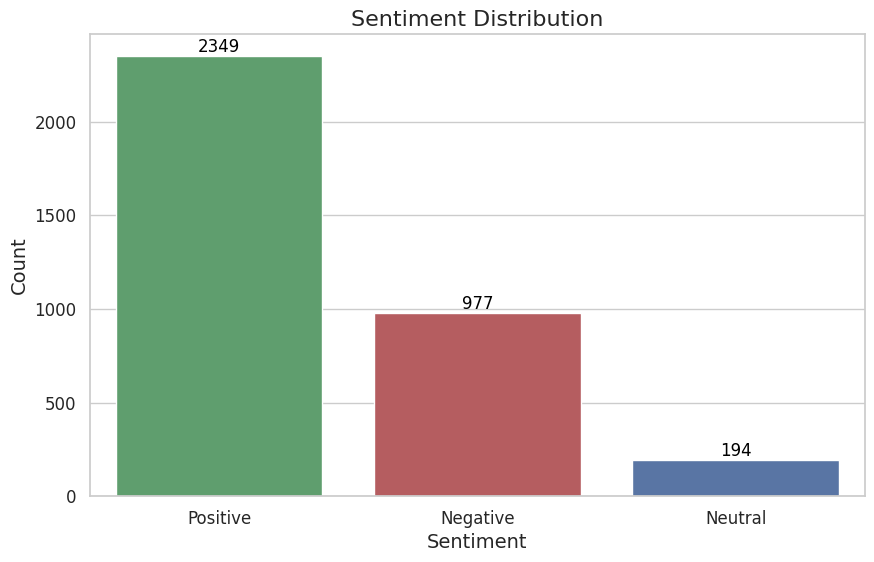

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set labels and counts based on the sentiment analysis results
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_counts, negative_counts, neutral_counts]

# Set a Seaborn style
sns.set(style="whitegrid")

# Plot graph with a more attractive style
plt.figure(figsize=(10, 6))
colors = ['#55a868', '#c44e52', '#4c72b0']  # Green, Red, Blue
sns.barplot(x=labels, y=counts, palette=colors)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sentiment Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

# Threads

In [ ]:
import pandas as pd
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('sentiwordnet')

# Load your social media dataset with 'TEXT' column
data = pd.read_csv('/content/drive/My Drive/electiveFinal/InstaThreads.csv')  # Replace with your dataset file

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Initialize counts
positive_counts = 0
negative_counts = 0
neutral_counts = 0

# Function to calculate sentiment score for a sentence using SentiWordNet
def calculate_sentiment_score(text):
    global positive_counts, negative_counts, neutral_counts  # Use global counts

    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

    pos_score = 0
    neg_score = 0
    word_count = 0

    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        for syn in synsets:
            pos_score += syn.pos_score()
            neg_score += syn.neg_score()
        word_count += 1

    # Calculate average sentiment score for the sentence
    if word_count > 0:
        avg_pos_score = pos_score / word_count
        avg_neg_score = neg_score / word_count
        sentiment_score = avg_pos_score - avg_neg_score

        if sentiment_score > 0:
            positive_counts += 1
            return 'positive'
        elif sentiment_score < 0:
            negative_counts += 1
            return 'negative'
        else:
            neutral_counts += 1
            return 'neutral'
    else:
        return 'neutral'

# Apply sentiment analysis function to each text in the dataset
data['Sentiment'] = data['review_description'].apply(calculate_sentiment_score)

# Display the dataset with sentiment labels
print(data[['review_description', 'Sentiment']])

# Display counts at the end
print("\nSentiment Counts:")
print(f"Positive: {positive_counts}")
print(f"Negative: {negative_counts}")
print(f"Neutral: {neutral_counts}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


                                      review_description Sentiment
0      Meh. Not the greatest experience on a Chromebo...  positive
1      Pretty good for a first launch!! Its easy to u...  positive
2      For a brand new app, it's very well optimized....  positive
3      Great app with a lot of potential! However, th...  positive
4      The app is good, but it needs a lot of functio...  positive
...                                                  ...       ...
32905  This killed my dog. Mark zuckerburg strangled ...  negative
32906              Add Search and hashtag like Twitter !  positive
32907                                        bad twister  negative
32908                       Yet another trash from Meta.  negative
32909  Nothing special this app is just a copy of twi...  positive

[32910 rows x 2 columns]

Sentiment Counts:
Positive: 22111
Negative: 5517
Neutral: 3860


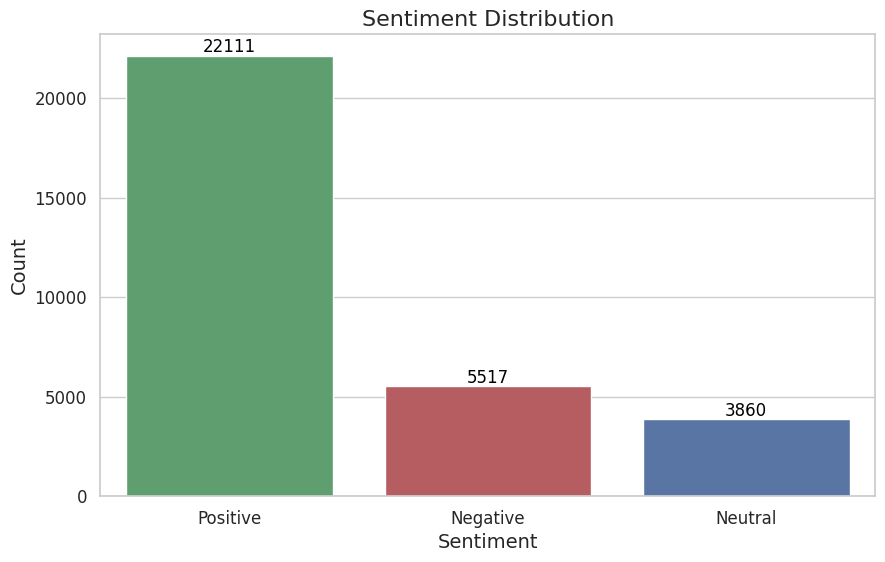

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set labels and counts based on the sentiment analysis results
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_counts, negative_counts, neutral_counts]

# Set a Seaborn style
sns.set(style="whitegrid")

# Plot graph with a more attractive style
plt.figure(figsize=(10, 6))
colors = ['#55a868', '#c44e52', '#4c72b0']  # Green, Red, Blue
sns.barplot(x=labels, y=counts, palette=colors)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sentiment Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

# **TikTok**

In [ ]:
import pandas as pd
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('sentiwordnet')

# Load your social media dataset with 'TEXT' column
data = pd.read_csv('/content/drive/My Drive/electiveFinal/TikTok.csv')  # Replace with your dataset file

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Initialize counts
positive_counts = 0
negative_counts = 0
neutral_counts = 0

# Function to calculate sentiment score for a sentence using SentiWordNet
def calculate_sentiment_score(text):
    global positive_counts, negative_counts, neutral_counts  # Use global counts

    if isinstance(text, str):  # Check if text is a string
        tokens = word_tokenize(text.lower())
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

        pos_score = 0
        neg_score = 0
        word_count = 0

        for token in tokens:
            synsets = list(swn.senti_synsets(token))
            for syn in synsets:
                pos_score += syn.pos_score()
                neg_score += syn.neg_score()
            word_count += 1

        # Calculate average sentiment score for the sentence
        if word_count > 0:
            avg_pos_score = pos_score / word_count
            avg_neg_score = neg_score / word_count
            sentiment_score = avg_pos_score - avg_neg_score

            if sentiment_score > 0:
                positive_counts += 1
                return 'positive'
            elif sentiment_score < 0:
                negative_counts += 1
                return 'negative'
            else:
                neutral_counts += 1
                return 'neutral'
        else:
            return 'neutral'
    else:
        return 'neutral'  # Handle non-string values by considering them as neutral

# Apply sentiment analysis function to each text in the dataset
data['Sentiment'] = data['content'].apply(calculate_sentiment_score)

# Display the dataset with sentiment labels
print(data[['content', 'Sentiment']])

# Display counts at the end
print("\nSentiment Counts:")
print(f"Positive: {positive_counts}")
print(f"Negative: {negative_counts}")
print(f"Neutral: {neutral_counts}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
<ipython-input-6-3602548a38d8>:15: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/electiveFinal/TikTok.csv')  # Replace with your dataset file


                                                  content Sentiment
0                                                No words   neutral
1                                   Great fun app so far!  positive
2       The app would get a higher rating but I litera...  positive
3       I WISH I COULD GIVE THIS A 100 PERCENT RATING ...  positive
4                                     Pictures and record  positive
...                                                   ...       ...
460282                                                 😍😍   neutral
460283                                          Very nice  positive
460284                                               Nice  positive
460285                               TikTok love your sad  positive
460286                             Good to use haroon_231  positive

[460287 rows x 2 columns]

Sentiment Counts:
Positive: 325203
Negative: 39469
Neutral: 71533


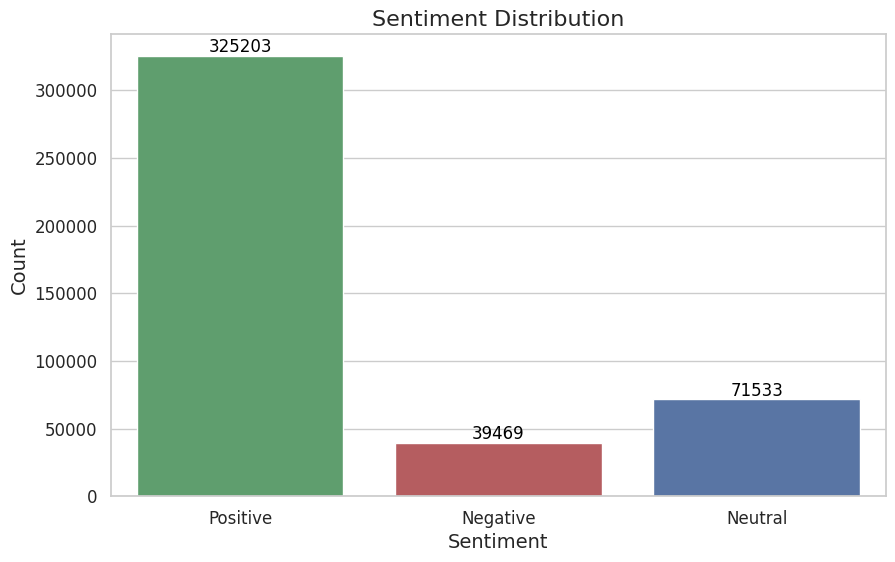

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set labels and counts based on the sentiment analysis results
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_counts, negative_counts, neutral_counts]

# Set a Seaborn style
sns.set(style="whitegrid")

# Plot graph with a more attractive style
plt.figure(figsize=(10, 6))
colors = ['#55a868', '#c44e52', '#4c72b0']  # Green, Red, Blue
sns.barplot(x=labels, y=counts, palette=colors)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sentiment Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()